## Taller 1 - Reconstrucción 3D a partir de imágenes usando SfM.

### Introducción a la Visión por Computadora

### Luceth Argote

### Importar e instalar librerías.

In [ ]:
!pip install pycolmap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 79.0 MB/s eta 0:00:00


In [ ]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: flask
    Found existing installation: Flask 3.1.0
    Uninst

In [ ]:
import numpy as np
import cv2 as cv
import glob
import pycolmap
import open3d as o3d
import shutil
from tqdm import tqdm
import seaborn as sns

from google.colab.patches import cv2_imshow
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Calibración de la cámara.

In [ ]:
chessboardSize = (7,7)

frameSize = (358, 268)

In [ ]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [ ]:
objp = np.zeros((chessboardSize[0]*chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)

In [ ]:
objPoints = []
imgPoints = []

In [ ]:
chess = glob.glob('chess/*.jpeg')

In [ ]:
for image in chess:
    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    #Detectar esquinas del tablero
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)

    if ret == True:
        objPoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgPoints.append(corners)

        # Dibujar las esquinas detectadas
        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        #cv.imshow("Chessboard", img)
        #cv2_imshow(img)
        cv.waitKey(1000)

cv.destroyAllWindows()

In [ ]:
#Calibración
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objPoints, imgPoints, gray.shape[::-1], None, None)

#Guardar parámetros de calibración
np.savez("calibration_data.npz", mtx=mtx, dist=dist)

In [ ]:
#Cargar los parámetros de calibración
calib_data = np.load("calibration_data.npz")
mtx = calib_data["mtx"]
dist = calib_data["dist"]

### Pre-procesamiento de imágenes, Detección de Características y Emparejamiento.

In [ ]:
#Cargar las imagenes del parlante
parlante = glob.glob('parlante/*.jpeg')

Detección de características usando SIFT.

In [ ]:
#Inicializar SIFT
sift = cv.SIFT_create()

keypoints_list = []
descriptors_list = []
loaded_images = []

parlante/WhatsApp Image 2025-02-24 at 5.08.15 PM (1).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.17 PM (2).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.14 PM (1).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.16 PM (5).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.12 PM.jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.16 PM (4).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.15 PM.jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.14 PM.jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.16 PM.jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.16 PM (1).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.15 PM (3).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.16 PM (3).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.11 PM (1).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.10 PM (1).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.10 PM (2).jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.13 PM.jpeg
parlante/WhatsApp Image 2025-02-24 at 5.08.15 PM (2).jpeg
parlante/WhatsApp Image 2025-02-24

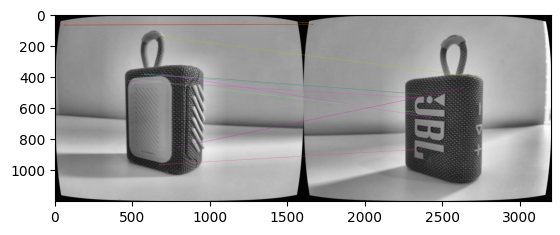

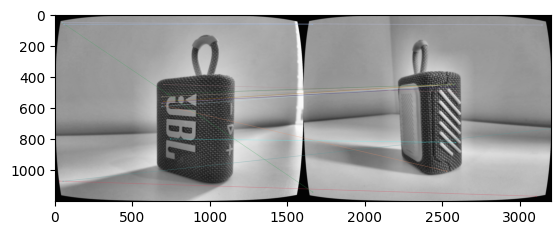

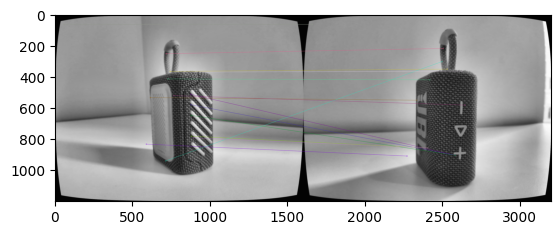

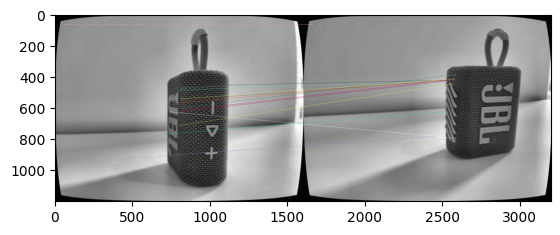

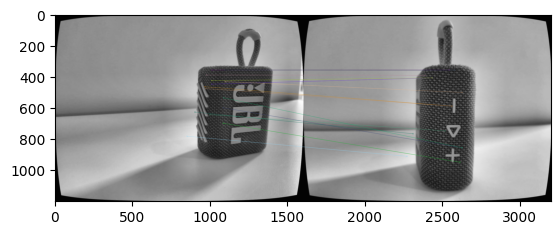

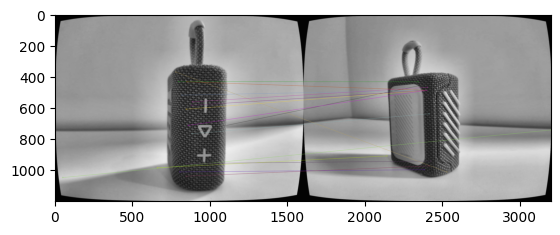

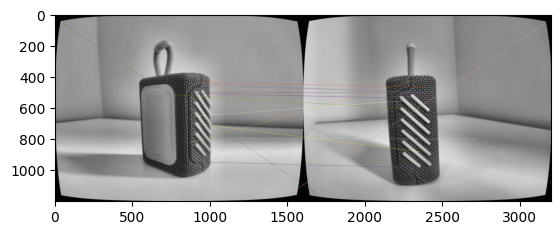

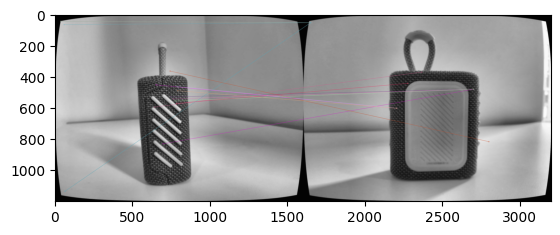

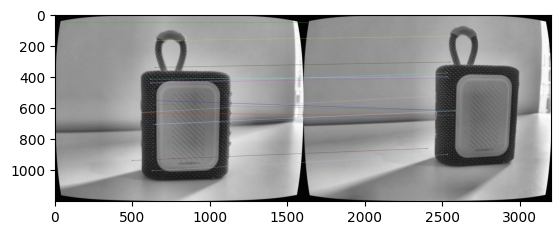

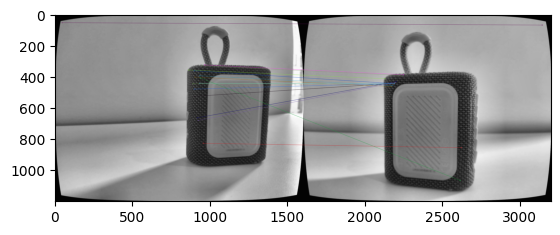

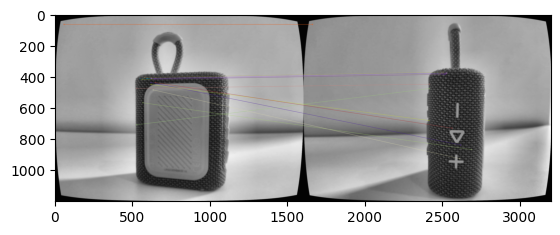

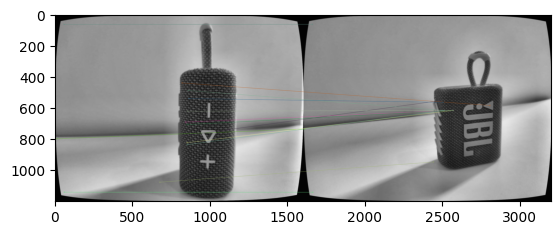

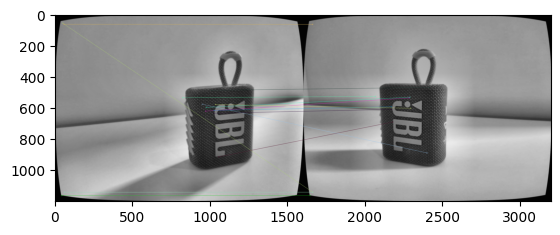

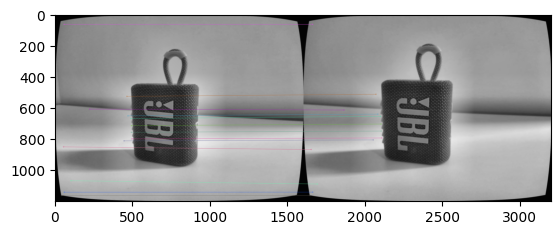

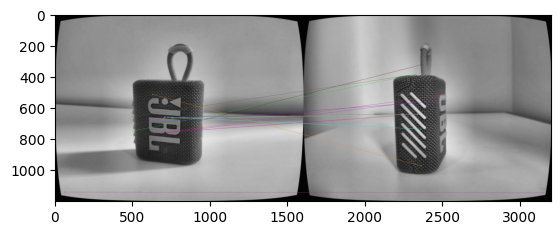

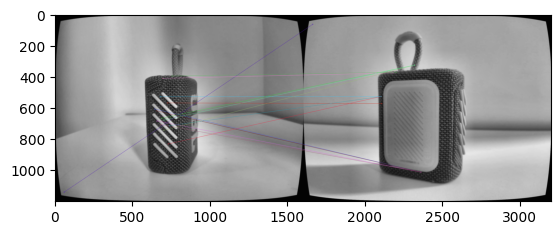

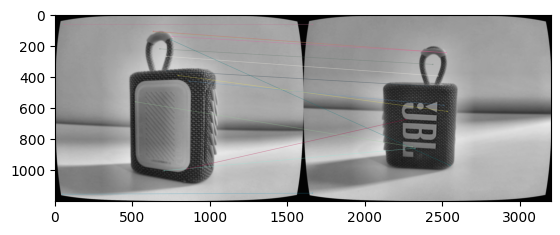

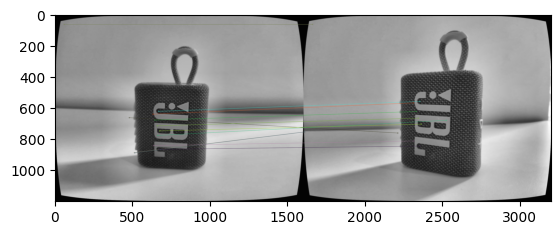

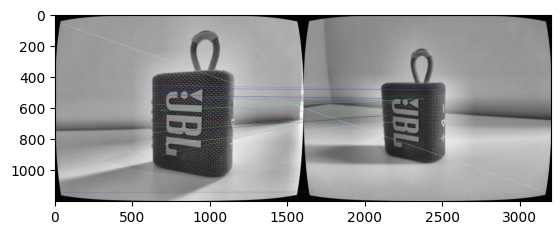

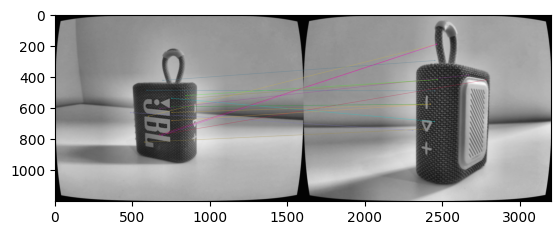

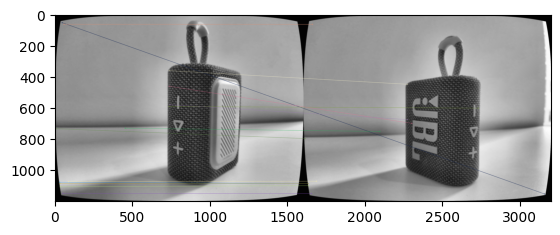

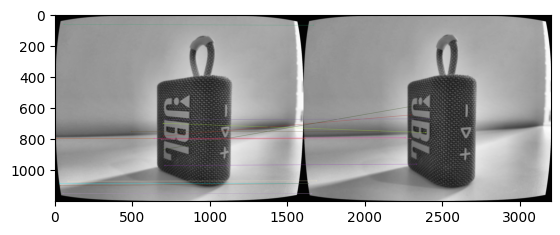

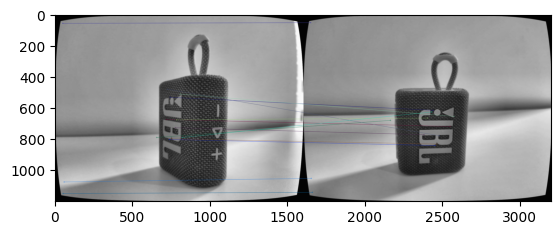

In [ ]:
for image in parlante:
    print(image)
    img = cv.imread(image)
    h, w = img.shape[:2]

    #Corregir distorsión
    new_camera_mtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    undistorted = cv.undistort(img, mtx, dist, None, new_camera_mtx)

    #Escala de grises
    gray = cv.cvtColor(undistorted, cv.COLOR_BGR2GRAY)

    #Mejoras de contraste
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(gray)

    #Reducción de ruido
    denoised = cv.bilateralFilter(cl1, d=9, sigmaColor=75, sigmaSpace=75)

    #Detectar las esquinas
    dst = cv.cornerHarris(denoised, 2, 3, 0.04)

    dst = cv.dilate(dst, None)

    #Seleccionar las esquinas más destacadas
    corners = np.argwhere(dst > 0.01 * dst.max())

    if len(corners) >= 9:  # Si se detectan al menos 9 puntos
        #Dibujar esquinas detectadas
        for x, y in corners[:9]:
            cv.circle(undistorted, (y, x), 5, (0, 255, 0), -1)

    #Aplicar SIFT sobre la imagen
    keypoints, descriptors = sift.detectAndCompute(denoised, None)

    #Guardar resultados
    keypoints_list.append(keypoints)
    descriptors_list.append(descriptors)
    loaded_images.append(denoised)

# Emparejamiento de características con FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

for i in range(len(loaded_images) - 1):
    img1, img2 = loaded_images[i], loaded_images[i + 1]
    kp1, kp2 = keypoints_list[i], keypoints_list[i + 1]
    des1, des2 = descriptors_list[i], descriptors_list[i + 1]

    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Dibujar los mejores 20 emparejamientos
    img_matches = cv.drawMatches(img1, kp1, img2, kp2, good_matches[:15], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    #cv2_imshow(img_matches)
    #cv.waitKey(500)
    plt.imshow(img_matches)
    plt.show()

cv.destroyAllWindows()

Se puede ver que se obtuvieron buenos emparejamientos por lo que se tomaron buenas fotos, se escogió un buen objeto y se aplicaron correctamente las correcciones.

### Estimación de la matriz fundamental y la matriz escencial.

In [ ]:
# Cargar la matriz de calibración de la cámara
calib_data = np.load("calibration_data.npz")
K = calib_data["mtx"]  # Matriz intrínseca de la cámara

# Listas para almacenar los resultados
matriz_fundamental = []
matriz_escencial = []
rotaciones = []
traslaciones = []

# Asegurar que las listas de keypoints y matches existen
lista_keys = keypoints_list
lista_matches = []

# Calcular los emparejamientos entre imágenes
for i in range(len(loaded_images) - 1):
    des1, des2 = descriptors_list[i], descriptors_list[i + 1]
    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
    lista_matches.append(good_matches)

# Estimar las matrices fundamentales y esenciales
for i in tqdm(range(len(lista_keys) - 1), desc="Calculando matrices"):

    pts1 = np.float32([lista_keys[i][m.queryIdx].pt for m in lista_matches[i]])
    pts2 = np.float32([lista_keys[i + 1][m.trainIdx].pt for m in lista_matches[i]])

    if len(pts1) >= 8:  # Se necesitan al menos 8 puntos para RANSAC
        # Calcular la matriz fundamental
        F, mask = cv.findFundamentalMat(pts1, pts2, cv.FM_RANSAC)
        matriz_fundamental.append(F)

        # Filtrar los inliers después de RANSAC
        pts1 = pts1[mask.ravel() == 1]
        pts2 = pts2[mask.ravel() == 1]

        # Calcular la matriz esencial
        E, mask = cv.findEssentialMat(pts1, pts2, K, cv.RANSAC, prob=0.99999, threshold=0.1)
        matriz_escencial.append(E)

        # Filtrar los inliers nuevamente
        pts1 = pts1[mask.ravel() == 1]
        pts2 = pts2[mask.ravel() == 1]

        # Recuperar rotación y traslación
        _, R, t, _ = cv.recoverPose(E, pts1, pts2, K)
        rotaciones.append(R)
        traslaciones.append(t)

# Imprimir los resultados
print(f"Se calcularon {len(matriz_fundamental)} matrices fundamentales")
print(f"Se calcularon {len(matriz_escencial)} matrices esenciales")
print(f"Se calcularon {len(rotaciones)} rotaciones")
print(f"Se calcularon {len(traslaciones)} traslaciones")

Calculando matrices: 100%|██████████| 23/23 [00:04<00:00,  4.91it/s]

Se calcularon 23 matrices fundamentales
Se calcularon 23 matrices esenciales
Se calcularon 23 rotaciones
Se calcularon 23 traslaciones


In [ ]:
for i in range(len(matriz_fundamental)):
    print(f"\nPar de imágenes {i}-{i+1}")
    print("Matriz Fundamental (F):\n", np.round(matriz_fundamental[i], 3))
    print("Matriz Esencial (E):\n", np.round(matriz_escencial[i], 3))
    print("Rotación (R):\n", np.round(rotaciones[i], 3))
    print("Traslación (t):\n", np.round(traslaciones[i].ravel(), 3))


Par de imágenes 0-1
Matriz Fundamental (F):
 [[-0.    -0.     0.019]
 [-0.     0.    -0.028]
 [ 0.051 -0.059  1.   ]]
Matriz Esencial (E):
 [[ 0.69  -0.076  0.132]
 [-0.061 -0.68  -0.107]
 [-0.019  0.151  0.017]]
Rotación (R):
 [[ 0.088  0.99   0.109]
 [ 0.996 -0.086 -0.023]
 [-0.014  0.11  -0.994]]
Traslación (t):
 [0.045 0.211 0.976]

Par de imágenes 1-2
Matriz Fundamental (F):
 [[ 0.     0.    -0.001]
 [-0.    -0.     0.001]
 [-0.001 -0.     1.   ]]
Matriz Esencial (E):
 [[-0.497  0.488  0.121]
 [ 0.473  0.505 -0.107]
 [ 0.059  0.078 -0.013]]
Rotación (R):
 [[-0.67  -0.723  0.167]
 [-0.663  0.684  0.303]
 [-0.334  0.093 -0.938]]
Traslación (t):
 [-0.014 -0.138  0.99 ]

Par de imágenes 2-3
Matriz Fundamental (F):
 [[ 0.    -0.    -0.001]
 [-0.    -0.     0.001]
 [-0.002  0.002  1.   ]]
Matriz Esencial (E):
 [[-0.63   0.299  0.108]
 [ 0.288  0.624  0.022]
 [ 0.108  0.131 -0.001]]
Rotación (R):
 [[-0.439 -0.894 -0.09 ]
 [-0.845  0.377  0.379]
 [-0.305  0.242 -0.921]]
Traslación (t):
 